# Módulo 2 Análisis y Reporte sobre el desempeño del modelo.

Federico Medina A01721441

Instrucciones: Escoge una de las 2 implementaciones que tengas y genera un análisis sobre su desempeño en un set de datos. Este análisis lo deberás documentar en un reporte con indicadores claros y gráficas comparativas que respalden tu análisis.

Dataset utilizado: https://www.kaggle.com/datasets/bhuviranga/co2-emissions?select=CO2+Emissions.csv

### Librerías Utilizadas

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import accuracy_score

### Lectura de Datos

In [38]:
df = pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [39]:
#Eliminamos las columnas que no se considerarán para el análisis

df = df.drop(columns=["Model", "Make", "Vehicle Class", "Transmission", "Fuel Type"])


### Descripción de los Datos

In [40]:
df.describe() #Observamos la descripción de los datos del dataframe

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Implementación de la Regresión Lineal

#### Utilizando validación

In [41]:
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']


# crear las variables de entrenamiento, validacion y prueba
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='CO2 Emissions(g/km)', train_size=0.6, valid_size=0.2, test_size=0.2)

In [42]:
# crear el modelo

model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [43]:
# predecir los valores de CO2 Emissions
y_pred = model.predict(X_valid)

In [44]:
# imprimimos los valores de los coeficientes
print('Beta_0 = ', model.intercept_)
print(model.coef_)

Beta_0 =  237.84793751045407
[ 4.84162966  7.89229137  2.59068319  7.53978554 -4.4694551  -3.58898359]


Con los resultados arrojados anteriormente, observamos que la regresión está descrita por la ecuación $y = \beta_0 + \beta_1 * x_1 ... \beta_6 * x_6$ donde los valores de $\beta$ son:

- $\beta_0$ = 237.84793
- $\beta_1$ = 4.84162
- $\beta_2$ = 7.89229
- $\beta_3$ = 2.59068
- $\beta_4$ = 7.53978
- $\beta_5$ = -4.46945
- $\beta_6$ = -3.58898

y los valores de $x_k$ representan los valores de cada una de las variables que se establecieron.

In [45]:
# imprimir los valores de los errores

print('Error Medio Cuadrado: ', mean_squared_error(y_valid, y_pred))
print('Error Medio Absoluto: ', mean_absolute_error(y_valid, y_pred))
print('Coeficiente del modelo: ', model.score(X_train,y_train))

Error Medio Cuadrado:  322.03473484779215
Error Medio Absoluto:  11.253775870480293
Coeficiente del modelo:  0.9053281004590975


Ahora graficaremos los datos obtenidos (predicted) contra los valores reales para verificar que la validación haya sido buena y después utilizar el train pero con los valores de prueba. Igualmente podemos ver que el modelo no tiene overfitting ni underfitting, ya que gracias a las métricas encontradas en el validation vemos que los valores no son muy pequeños, por lo que el modelo generaliza bien los datos con un error en la predicción para dar espacio a la variación de los datos.

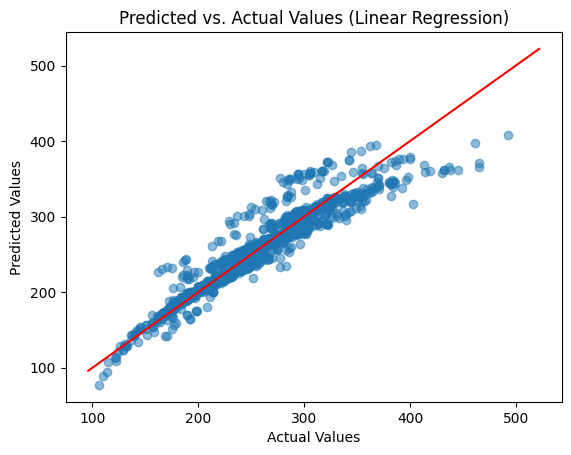

In [46]:
plt.scatter(y_valid, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()

Observamos que los datos si siguen la recta roja, la cual representa la regresión lineal establecida en el modelo. Finalmente, se hará un gráfico de los residuos contra los valores predecidos apra ver si realmente es buena la regresión.

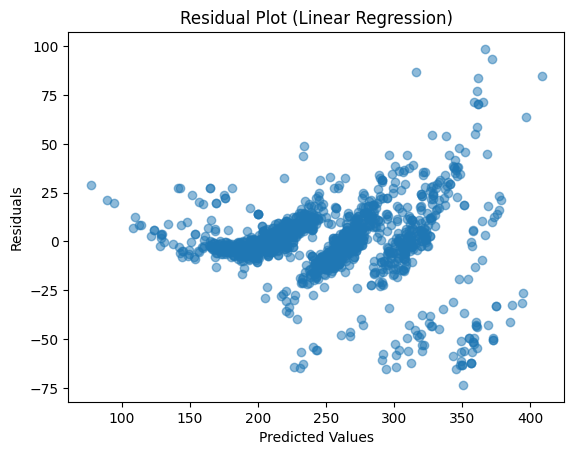

In [47]:
plt.scatter(y_pred, y_valid - y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

Observamos que los residuos se concentran en el valor de 0, lo cual indica que hay una media $\mu_e = 0$, sin embargo, vemos que hay cierto incremento en la varianza lo cual indica que no hay homocedasticidad en los datos. Sin embargo, vemos que los datos si se comportan masomenos como buscabamos, por lo que ahora se realizará la predicción pero con el test y finalmente se buscará predecir algunos datos de este.

#### Utilizando Test

In [48]:
# crear el modelo

lr = LinearRegression()
lr.fit(X_train,y_train) 

LinearRegression()

In [49]:
# predecir los valores de CO2 Emissions
y_pred = lr.predict(X_test)

In [50]:
# imprimimos los valores de los coeficientes
print('Beta_0 = ', lr.intercept_)
print(lr.coef_)

Beta_0 =  237.84793751045407
[ 4.84162966  7.89229137  2.59068319  7.53978554 -4.4694551  -3.58898359]


Con los resultados arrojados anteriormente, observamos que la regresión está descrita por la ecuación $y = \beta_0 + \beta_1 * x_1 ... \beta_6 * x_6$ donde los valores de $\beta$ son:

- $\beta_0$ = 237.84793
- $\beta_1$ = 4.84162
- $\beta_2$ = 7.89229
- $\beta_3$ = 2.59068
- $\beta_4$ = 7.53978
- $\beta_5$ = -4.46945
- $\beta_6$ = -3.58898

y los valores de $x_k$ representan los valores de cada una de las variables que se establecieron.

In [51]:
# imprimir los valores de los errores

print('Error Medio Cuadrado: ', mean_squared_error(y_test, y_pred))
print('Error Medio Absoluto: ', mean_absolute_error(y_test, y_pred))
print('Coeficiente del modelo: ', lr.score(X_train,y_train))

Error Medio Cuadrado:  372.21360783727454
Error Medio Absoluto:  12.242207040447765
Coeficiente del modelo:  0.9053281004590975


Observamos que el Error Medio Cuadrado dio un valor más pequeño que en la validación, al igual que el valor de Error Medio Absoluto, mientras que el Coeficiente del Modelo dio un valor de 90.53%, lo cual es igual a la validación. Este coeficiente (Coeficiente de Pearson $R^2$) sirve para medir el grado de varianza del modelo, lo cual es muy bueno ya que tiene un valor muy alto. Ahora, graficaremos los valores predecidos y los residuos a ver si encontramos diferencia.

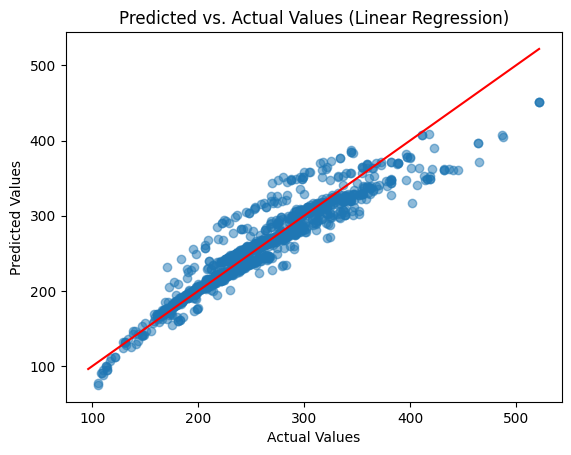

In [52]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Linear Regression)")
plt.show()

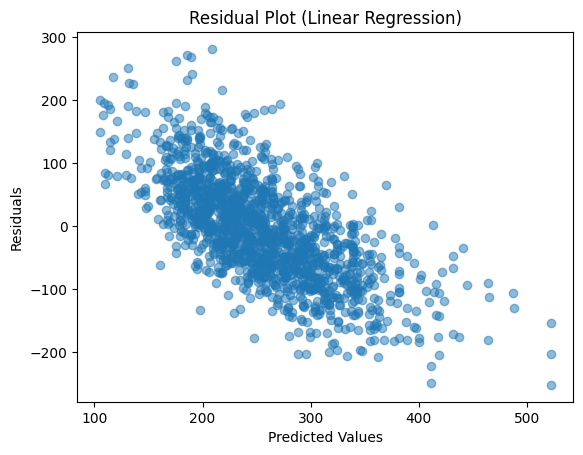

In [53]:
plt.scatter(y_test, y_valid - y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

Observando la primer gráfica, vemos que los valores son básicamente los mismos, ya que se entrenaron usando el mismo set de entrenamiento por lo que los valores predecidos deberían ser iguales mientras que los valores de test si cambiaron ya que se usaron primero los de validación y después el de test, pero si siguen un comportamiento establecido entonces deberían ser similares, por lo que vemos que si lo son. Por otro lado, al gráficar los residuos si encontramos mucha diferencia, principalmente porque en el test encontramos que hay cierto sesgo en los valores gracias a que no están exactamente rodeando la media $\mu_e = 0$ con pura vista por lo que se tiene que hacer una prueba de hipótesis para confirmar o rechazar si la verdadera media de los residuos es 0.

In [54]:
resultados = pd.DataFrame()
resultados['predicted'] = list(y_pred)
resultados['actual'] = list(y_test)
resultados['residual'] = resultados['predicted'] - resultados['actual']
resultados = resultados.sort_values(by='residual').reset_index(drop=True)
resultados.describe()

,predicted,actual,residual
count,1477.000000,1477.000000,1477.000000
mean,254.159398,254.885579,-0.726181
std,56.855352,61.709860,19.285696
min,74.853504,105.000000,-93.482653
25%,211.486496,210.000000,-8.425365
50%,251.589251,248.000000,0.548869
75%,297.884740,294.000000,6.019837
max,451.569696,522.000000,73.913778


- $H_0$: Los datos provienen de una población normal. $\mu_e=0$

- $H_1$: Los datos no provienen de una población normal. $\mu_e \neq 0$

- $\alpha$= 0.05

In [55]:
from statsmodels.stats import weightstats as stests

ztest ,propability_value = stests.ztest(resultados['residual'], x2=None, value=0)
print('valor p: ', float(propability_value))
if propability_value<0.05:
    print("Se rechaza la H0")
else:
    print("No se rechaza la H0")


valor p:  0.14786784990926552
No se rechaza la H0


Vemos que no se rechaza la $H_0$ por lo que confirmamos con un nivel de significancia del 95% que los residuos tienen una media $\mu_e= 0$, por lo que no hay sesgo en los datos.

### Evaluación del Modelo

Ahora para hacer predicciones agarraremos el primer valor del df que es:

- 2.0: Engine Size
- 4: Cylinders
- 9.9: Fuel Consumption City
- 6.7: Fuel Consumption Hwy
- 8.5: Fuel Consumption Comb (L/100km)
- 33: Fuel Consumption Comb (mpg)
- 196: CO2 Emissions

In [ ]:
df.iloc[0]

Engine Size(L)                        2.0
Cylinders                             4.0
Fuel Consumption City (L/100 km)      9.9
Fuel Consumption Hwy (L/100 km)       6.7
Fuel Consumption Comb (L/100 km)      8.5
Fuel Consumption Comb (mpg)          33.0
CO2 Emissions(g/km)                 196.0
Name: 0, dtype: float64

In [ ]:
#Verificamos resultado
h_196 = lr.intercept_ + lr.coef_[0]*2 + lr.coef_[1]*4 + lr.coef_[2]*9.9 + lr.coef_[3]*6.7 + lr.coef_[4]*8.5 + lr.coef_[5]*33
h_196

199.2431275195271

Observamos que el modelo da un valor bastante cerca al real, siendo el valor predecido 199.24 mientras que el real es de 196.

Ahora intentaremos lo mismo pero para el segundo y tercer valor del df que es:

**2da verificación**
- 2.4: Engine Size
- 4: Cylinders
- 11.2: Fuel Consumption City
- 7.7: Fuel Consumption Hwy
- 9.6: Fuel Consumption Comb (L/100km)
- 29: Fuel Consumption Comb (mpg)
- 221: CO2 Emissions


**3ra verificación**
- 1.5: Engine Size
- 4: Cylinders
- 6: Fuel Consumption City
- 5.8: Fuel Consumption Hwy
- 5.9: Fuel Consumption Comb (L/100km)
- 48: Fuel Consumption Comb (mpg)
- 136: CO2 Emissions

In [ ]:
df.iloc[1]

Engine Size(L)                        2.4
Cylinders                             4.0
Fuel Consumption City (L/100 km)     11.2
Fuel Consumption Hwy (L/100 km)       7.7
Fuel Consumption Comb (L/100 km)      9.6
Fuel Consumption Comb (mpg)          29.0
CO2 Emissions(g/km)                 221.0
Name: 1, dtype: float64

In [ ]:
#Verificamos resultado
h_221 = lr.intercept_ + lr.coef_[0]*2.4 + lr.coef_[1]*4 + lr.coef_[2]*11.2 + lr.coef_[3]*7.7 + lr.coef_[4]*9.6 + lr.coef_[5]*29
h_221

220.6968365216722

Observamos que para la segunda verificación, el modelo predice un dato de 220.69 mientras que el valor real es de 221, lo cual es muy cercano a lo que se estaba buscando obtener.

In [ ]:
df.iloc[2]

Engine Size(L)                        1.5
Cylinders                             4.0
Fuel Consumption City (L/100 km)      6.0
Fuel Consumption Hwy (L/100 km)       5.8
Fuel Consumption Comb (L/100 km)      5.9
Fuel Consumption Comb (mpg)          48.0
CO2 Emissions(g/km)                 136.0
Name: 2, dtype: float64

In [ ]:
#Verificamos resultado
h_136 = lr.intercept_ + lr.coef_[0]*1.5 + lr.coef_[1]*4 + lr.coef_[2]*6 + lr.coef_[3]*5.8 + lr.coef_[4]*5.9 + lr.coef_[5]*48
h_136

136.79525586086737

Ahora con la tercer verificación, se obtuvo un valor de 136.79 contra el 136 real, lo cual mantiene la postura de que el modelo logra predecir los datos en base a los parámetros que se le dieron. Con esto y al observar los valores del Error Medio cuadrado y del Error Medio Absoluto, al igual que el coeficiente de correlación del modelo, podemos asegurar que el modelo es muy bueno para predecir valores dentro del dataset.